In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv("gdrive/My Drive/ML_Data/DigitsData/train.csv")
test_data = pd.read_csv("gdrive/My Drive/ML_Data/DigitsData/test.csv")

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


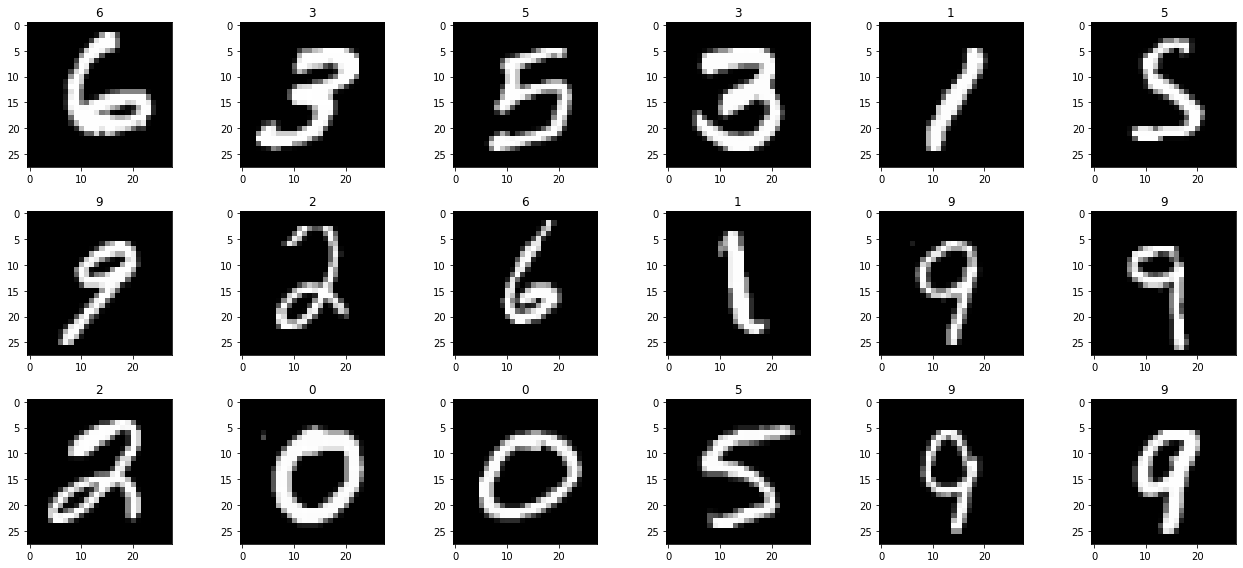

In [ ]:
def show_image(train_image,label,index):
    image_shaped = train_image.values.reshape(28,28)
    plt.subplot(3,6,index+1)
    plt.imshow(image_shaped,cmap = plt.cm.gray)
    plt.title(label)

plt.figure(figsize = (18,8))
sample_image = train_data.sample(18).reset_index(drop=True)
for index,row in sample_image.iterrows():
    label = row['label']
    image_pixels = row.drop('label')
    show_image(image_pixels,label,index)
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
x = train_data.drop(columns=['label']).values.reshape(train_data.shape[0],28,28,1)

In [ ]:
y = to_categorical(train_data['label'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_datagen.fit(x_train)

In [ ]:
train_generator = train_datagen.flow(x_train,
    y_train,
    batch_size=32)

In [ ]:
train_datagen.fit(x_test)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
validation_generator = validation_datagen.flow(
    x_test,
    y_test
)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# Callbacks
# Early Stopping: When the model's accuracy no more increases or loss is not decreasing anymore
# the model training stops

# ReduceROnPlateau
# Reduce Learning rate when the metric has stopped improving

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
]

In [ ]:
FAST_RUN=False
batch_size=32
epochs=100
if FAST_RUN:
    epochs=1
    
model.fit_generator(
    train_generator, 
    steps_per_epoch=len(x_train) // batch_size, 
    validation_data=validation_generator,
    validation_steps=len(x_test) // batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/100
1050/1050 [==============================] - 19s 12ms/step - loss: 0.7052 - accuracy: 0.7772 - val_loss: 0.1075 - val_accuracy: 0.9629
Epoch 2/100
1050/1050 [==============================] - 12s 11ms/step - loss: 0.1830 - accuracy: 0.9464 - val_loss: 0.0664 - val_accuracy: 0.9810
Epoch 3/100
1050/1050 [==============================] - 12s 11ms/step - loss: 0.1443 - accuracy: 0.9592 - val_loss: 0.0656 - val_accuracy: 0.9814
Epoch 4/100
1050/1050 [==============================] - 12s 11ms/step - loss: 0.1238 - accuracy: 0.9643 - val_loss: 0.0505 - val_accuracy: 0.9853
Epoch 5/100
1050/1050 [==============================] - 12s 11ms/step - loss: 0.1097 - accuracy: 0.9676 - val_loss: 0.0475 - val_accuracy: 0.9858
Epoch 6/100
1050/1050 [==============================] - 12s 11ms/step - loss: 0.1034 - accuracy: 0.9692 - val_loss: 0.0472 - val_accuracy: 0.9866
Epoch 7/100
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0946 - accuracy: 0.9720 - val_loss: 0

In [ ]:
x_test_rescaled = (x_test.astype("float32") / 255)
scores = model.evaluate(x_test_rescaled, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

accuracy: 98.98%
loss: 3.36%


In [ ]:
test_digit_data = test_data.values.reshape(test_data.shape[0],28,28,1).astype("float32") / 255
predictions = model.predict(test_digit_data)
results = np.argmax(predictions, axis = 1) 

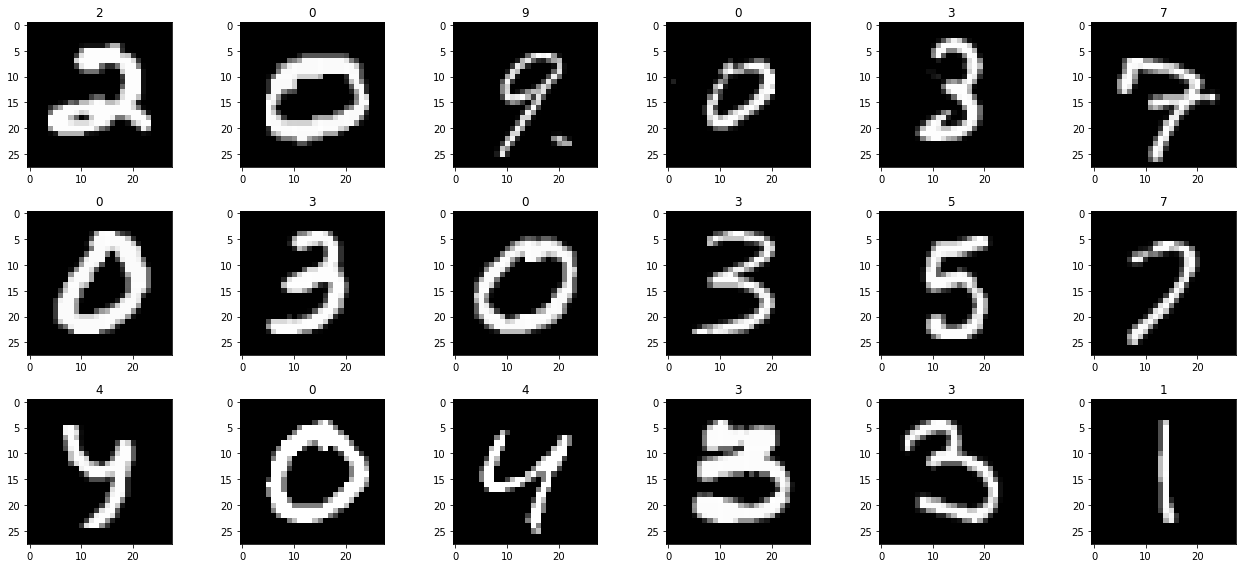

In [ ]:
plt.figure(figsize=(18, 8))
sample_test = test_data.head(18)
for index, image_pixels in sample_test.iterrows():
    label = results[index]
    show_image(image_pixels, label, index)
plt.tight_layout()

In [ ]:
submissions = pd.read_csv("gdrive/My Drive/ML_Data/DigitsData/sample_submission.csv")
submissions['Label'] = results
submissions.to_csv('gdrive/My Drive/ML_Data/DigitsData/submission.csv', index = False)

In [ ]:
submissions

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
